In [12]:
## compare the number of insert&delete and order operations.

[101.30271931606418, 23.01234180138568, 147.96236505695938, 10.008425324675324, 16.2394053892811, 140.62750910640935, 70.61234811929539, 252.63619100367924, 303.98815617945377, 16.810149329283725, 83.72714150390185, 287.3481603569742]


<Figure size 2000x500 with 0 Axes>

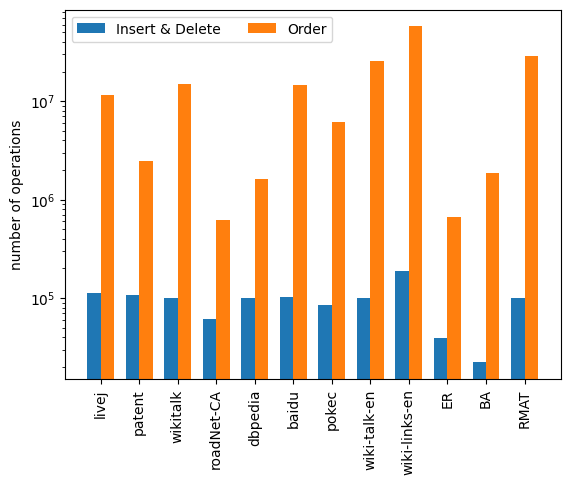

In [14]:
import csv
import numpy as np
import scipy.stats
import scipy as sp
import re
import matplotlib.pyplot as plt
import matplotlib
from tabulate import tabulate

ispdf = False
path = "../results/"
files = [
    "results-10-4-2021-T5-hp.csv" #T5 the average running time for repeated random graphs. 10 times test.
]


graph_name = [
    "livej",
    "patent", 
    "wikitalk",
    "roadNetCA",
    "dbpedia",
    "baidu",
    "pokec",
    "wiki_talk_en",
    "wiki-links",
    #"ssca2",
    # "com-friendster",
    # "twitter",
    # "twitter_mpi",
    "er-1m-8m",
    "ba-1m-8m",
    "rmat-1m-8m"
]

# for stability test or scalability test
selected_graph = {"wikitalk", "roadNetCA", "dbpedia", "ba-1m-8m"}

graph_title = [
    "livej",
    "patent",
    "wikitalk",
    "roadNet-CA",
    "dbpedia",
    "baidu", 
    "pokec",
    "wiki-talk-en",
    "wiki-links-en",
    #"ssca2",
    # "com-friendster",
    # "twitter",
    # "twitter-mpi",
    "ER",
    "BA",
    "RMAT",
]
all_graph_name = set() # load all graphs


algs = ["2", "3"] # Order-Based, our Simplified Order-Based, 
workers = [1] #[1, 2, 4, 6, 8, 10, 12, 14, 16, 32]
data = [] # load all data in csv files

def read_data():
    global data
    for p in files:
        p = path + p
        f = open(p,'rt')
        reader = csv.DictReader(f)
        for row in reader:
            #if float(row["mstime"]) < 0: continue 
            all_graph_name.add(row["model"])
            data.append(row)
        f.close()
def parse_data_om(model, worker, alg, isInsert, isInit=False):
    global data
    for row in data:
        if model != row["model"]: continue
        if str(worker) != row["workers"]: continue
        if alg != row["alg"]: continue
        if isInit: mstimes.append(float(row["init-mstime"])); continue
        if isInsert and "0" != row["insert-num"]:
            return (row["V*"], row["S"])
        

# draw the bar chart to show the running time. 
def draw_running_time_bar(isInsert, filename, method):
    global graph_name, graph_title, algs
    # x is graph title, y is the running time
    N = len(graph_name); ind = np.arange(N);
    plt.figure(figsize=(20, 5))
    fig, ax = plt.subplots()
    
    y1=[]; y2=[]; y3=[]
    for model, title in zip(graph_name, graph_title):
        r = parse_data_om(model, 1, "2", isInsert); y1.append(int(r[0])); y2.append(int(r[1])); y3.append(int(r[1]) / int(r[0]))
    width=0.35
    #width = 0.25
    ax.bar(ind, y1, width, bottom=0, label= "Insert & Delete", fill=True)
    #, hatch='///')
    ax.bar(ind+width, y2, width, bottom=0, label="Order", fill=True)
    #, fill=True, hatch='..')
    
    print(y3);
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(graph_title)
    ax.set_ylabel("number of operations")
    ax.set_yticks(np.arange(0, 126220656, 126220656/10))
    ax.set_yscale('log')
    
    #ax.set_yscale("log")
    ax.legend(ncol=2)
    ax.autoscale_view()
    plt.xticks(rotation=90)
    
    plt.savefig(filename, bbox_inches='tight')
    #plt.show()
    
read_data()
draw_running_time_bar(True, "om-core-maint.pdf", "I")



[np.float64(2.21), np.float64(1.14), np.float64(0.53), np.float64(0.3), np.float64(0.66), np.float64(0.55), np.float64(0.43)]
[np.float64(0.22), np.float64(0.09), np.float64(0.04), np.float64(0.02), np.float64(0.02), np.float64(0.01), np.float64(0.04)]
[np.float64(0.42), np.float64(0.15), np.float64(0.08), np.float64(0.03), np.float64(0.02), np.float64(0.03), np.float64(0.03)]
[np.float64(0.4), np.float64(0.24), np.float64(0.24), np.float64(0.75), np.float64(2.84), np.float64(1.47), np.float64(0.14)]


<Figure size 1600x300 with 0 Axes>

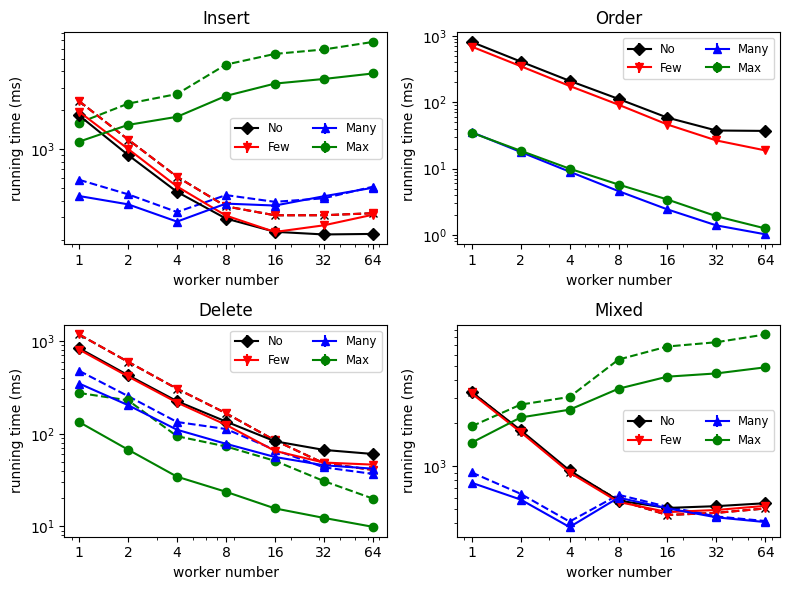

In [19]:
#### compare the running time for 3 case experiment. 
files = [
    "results-om-7-22-2022.csv" #repeated random data 
]
worker = [1, 2, 4, 8, 16, 32, 64]
method = ["Itime", "Otime", "Dtime", "Mtime"]
methodtitle = ["Insert", "Order", "Delete", "Mixed"]
case0 = "No"; case1="Few"; case2="Many"; case3="Max"
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return round(m, 2), round(h, 2), round(h, 2)
def mean_min_max(data):
    mean_time = np.mean(data)
    min_time = np.min(data)
    max_time = np.max(data)
    return (mean_time, round(max_time-mean_time,2), round(mean_time-min_time,2))

def read_data():
    global data
    for p in files:
        p = path + p
        f = open(p,'rt')
        reader = csv.DictReader(f)
        for row in reader:
            data.append(row)
        f.close()

def read_data_time(t, worker, l, timestr,):
    global data; mstimes = [];
    for row in data:
        if t != row["t"]: continue
        if l != row["l"]: continue
        if str(worker) != row["w"]: continue
         
        mstimes.append(float(row[timestr]))
    if len(mstimes) == 0: return 0
    else: return mean_confidence_interval(mstimes)

def draw_time():
    index = 1
    fig = plt.figure(figsize=(16, 3))
    fig = plt.figure(figsize=(8, 6))
    for name, title in zip(method, methodtitle):
        figstring = "22"+ str(index); index += 1
        #ax = fig.add_subplot(1,4, index); index += 1
        ax=fig.add_subplot(int(figstring))
        ax.set_xlabel("worker number")
        ax.set_ylabel("running time (ms)")
        
        x = worker; y0=[]; y1 =[]; y2=[]; y3=[]; y0error=[]; y1error = []; y2error=[]; y3error=[]
        y00= []; y11=[]; y22=[]; y33=[]; y00error=[]; y11error=[]; y22error=[]; y33error=[]
        for w in x: 
            if w == 0: 
                r0 = read_data_time("20", w, "3", name); y0.append(r0[0]); y0error.append(r0[1])
                r1 = read_data_time("21", w, "3", name); y1.append(r1[0]); y1error.append(r1[1])
                r2 = read_data_time("22", w, "3", name); y2.append(r2[0]); y2error.append(r2[1])
                r3 = read_data_time("23", w, "3", name); y3.append(r3[0]); y3error.append(r3[1])
                r00 = read_data_time("21", w, "3", name); y00.append(r00[0]); y00error.append(r00[1])
                r11 = read_data_time("21", w, "3", name); y11.append(r11[0]); y11error.append(r11[1])
                r22 = read_data_time("22", w, "3", name); y22.append(r22[0]); y22error.append(r22[1])
                r33 = read_data_time("23", w, "3", name); y33.append(r33[0]); y33error.append(r33[1])
            else:
                r0 = read_data_time("20", w, "0", name); y0.append(r0[0]); y0error.append(r0[1])
                r1 = read_data_time("21", w, "0", name); y1.append(r1[0]); y1error.append(r1[1])
                r2 = read_data_time("22", w, "0", name); y2.append(r2[0]); y2error.append(r2[1])
                r3 = read_data_time("23", w, "0", name); y3.append(r3[0]); y3error.append(r3[1])
                r00 = read_data_time("21", w, "1", name); y00.append(r00[0]); y00error.append(r00[1])
                r11 = read_data_time("21", w, "1", name); y11.append(r11[0]); y11error.append(r11[1])
                r22 = read_data_time("22", w, "1", name); y22.append(r22[0]); y22error.append(r22[1])
                r33 = read_data_time("23", w, "1", name); y33.append(r33[0]); y33error.append(r33[1])
        
        if False:
            ax.plot(x, y0, label=case0, marker="D", color="k")
            ax.plot(x, y1, label=case1, marker="v", color="red")
            ax.plot(x, y2, label=case2, marker="^", color="blue")
            ax.plot(x, y3, label=case3, marker="o", color="green")
        else:
            print(y0error)
            ax.errorbar(x, y0, label=case0, yerr=y0error, marker="D", color="k")
            ax.errorbar(x, y1, label=case1, yerr=y1error, marker="v", color="red")
            ax.errorbar(x, y2, label=case2, yerr=y2error, marker="^", color="blue")
            ax.errorbar(x, y3, label=case3, yerr=y3error, marker="o", color="green")
        
        
        if name != "Otime":
            ax.plot(x, y00,  marker="x", linestyle="dashed", color="k")
            ax.plot(x, y11,  marker="v", linestyle="dashed", color="red")
            #ax.errorbar(x, y11, label="Case1", yerr=y1error, marker="v", linestyle='dashed')
            ax.plot(x, y22,  marker="^", linestyle='dashed', color="blue")
            ax.plot(x, y33,  marker="o", linestyle='dashed', color="green")
        
        ax.set_yscale("log")
        ax.set_xscale("log")
        ax.set_xticks(worker)
        ax.set_title(title)
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        ax.legend(fontsize="small", ncol=2)
        
    fig.align_labels()
    fig.tight_layout()
    plt.savefig("om-time-2.pdf") 
    #plt.show()
global data; data=[]; read_data(); draw_time()

[np.float64(2.21), np.float64(1.14), np.float64(0.53), np.float64(0.3), np.float64(0.66), np.float64(0.55), np.float64(0.43)]
[np.float64(0.22), np.float64(0.09), np.float64(0.04), np.float64(0.02), np.float64(0.02), np.float64(0.01), np.float64(0.04)]
[np.float64(0.42), np.float64(0.15), np.float64(0.08), np.float64(0.03), np.float64(0.02), np.float64(0.03), np.float64(0.03)]
[np.float64(0.4), np.float64(0.24), np.float64(0.24), np.float64(0.75), np.float64(2.84), np.float64(1.47), np.float64(0.14)]


<Figure size 1600x300 with 0 Axes>

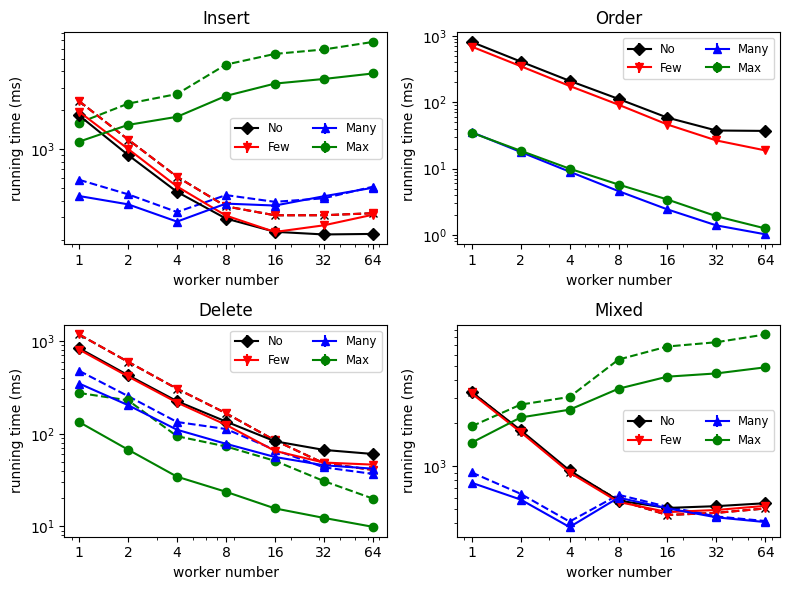

In [22]:
#### compare the running time for 3 case experiment. 
#### 2x2 figure
files = [
    "results-om-7-22-2022.csv" #repeated random data 
]
worker = [1, 2, 4, 8, 16, 32, 64]
method = ["Itime", "Otime", "Dtime", "Mtime"]
methodtitle = ["Insert", "Order", "Delete", "Mixed"]
case0 = "No"; case1="Few"; case2="Many"; case3="Max"
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return round(m, 2), round(h, 2), round(h, 2)
def mean_min_max(data):
    mean_time = np.mean(data)
    min_time = np.min(data)
    max_time = np.max(data)
    return (mean_time, round(max_time-mean_time,2), round(mean_time-min_time,2))

def read_data():
    global data
    for p in files:
        p = path + p
        f = open(p,'rt')
        reader = csv.DictReader(f)
        for row in reader:
            data.append(row)
        f.close()

def read_data_time(t, worker, l, timestr,):
    global data; mstimes = [];
    for row in data:
        if t != row["t"]: continue
        if l != row["l"]: continue
        if str(worker) != row["w"]: continue
         
        mstimes.append(float(row[timestr]))
    if len(mstimes) == 0: return 0
    else: return mean_confidence_interval(mstimes)

def draw_time():
    index = 1
    fig = plt.figure(figsize=(16, 3))
    fig = plt.figure(figsize=(8, 6))
    for name, title in zip(method, methodtitle):
        figstring = "22"+ str(index); index += 1
        #ax = fig.add_subplot(1,4, index); index += 1
        ax=fig.add_subplot(int(figstring))
        ax.set_xlabel("worker number")
        ax.set_ylabel("running time (ms)")
        
        x = worker; y0=[]; y1 =[]; y2=[]; y3=[]; y0error=[]; y1error = []; y2error=[]; y3error=[]
        y00= []; y11=[]; y22=[]; y33=[]; y00error=[]; y11error=[]; y22error=[]; y33error=[]
        for w in x: 
            if w == 0: 
                r0 = read_data_time("20", w, "3", name); y0.append(r0[0]); y0error.append(r0[1])
                r1 = read_data_time("21", w, "3", name); y1.append(r1[0]); y1error.append(r1[1])
                r2 = read_data_time("22", w, "3", name); y2.append(r2[0]); y2error.append(r2[1])
                r3 = read_data_time("23", w, "3", name); y3.append(r3[0]); y3error.append(r3[1])
                r00 = read_data_time("21", w, "3", name); y00.append(r00[0]); y00error.append(r00[1])
                r11 = read_data_time("21", w, "3", name); y11.append(r11[0]); y11error.append(r11[1])
                r22 = read_data_time("22", w, "3", name); y22.append(r22[0]); y22error.append(r22[1])
                r33 = read_data_time("23", w, "3", name); y33.append(r33[0]); y33error.append(r33[1])
            else:
                r0 = read_data_time("20", w, "0", name); y0.append(r0[0]); y0error.append(r0[1])
                r1 = read_data_time("21", w, "0", name); y1.append(r1[0]); y1error.append(r1[1])
                r2 = read_data_time("22", w, "0", name); y2.append(r2[0]); y2error.append(r2[1])
                r3 = read_data_time("23", w, "0", name); y3.append(r3[0]); y3error.append(r3[1])
                r00 = read_data_time("21", w, "1", name); y00.append(r00[0]); y00error.append(r00[1])
                r11 = read_data_time("21", w, "1", name); y11.append(r11[0]); y11error.append(r11[1])
                r22 = read_data_time("22", w, "1", name); y22.append(r22[0]); y22error.append(r22[1])
                r33 = read_data_time("23", w, "1", name); y33.append(r33[0]); y33error.append(r33[1])
        
        if False:
            ax.plot(x, y0, label=case0, marker="D", color="k")
            ax.plot(x, y1, label=case1, marker="v", color="red")
            ax.plot(x, y2, label=case2, marker="^", color="blue")
            ax.plot(x, y3, label=case3, marker="o", color="green")
        else:
            print(y0error)
            ax.errorbar(x, y0, label=case0, yerr=y0error, marker="D", color="k")
            ax.errorbar(x, y1, label=case1, yerr=y1error, marker="v", color="red")
            ax.errorbar(x, y2, label=case2, yerr=y2error, marker="^", color="blue")
            ax.errorbar(x, y3, label=case3, yerr=y3error, marker="o", color="green")
        
        
        if name != "Otime":
            ax.plot(x, y00,  marker="x", linestyle="dashed", color="k")
            ax.plot(x, y11,  marker="v", linestyle="dashed", color="red")
            #ax.errorbar(x, y11, label="Case1", yerr=y1error, marker="v", linestyle='dashed')
            ax.plot(x, y22,  marker="^", linestyle='dashed', color="blue")
            ax.plot(x, y33,  marker="o", linestyle='dashed', color="green")
        
        ax.set_yscale("log")
        ax.set_xscale("log")
        ax.set_xticks(worker)
        ax.set_title(title)
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        ax.legend(fontsize="small", ncol=2)
        
    fig.align_labels()
    fig.tight_layout()
    plt.savefig("om-time-2.pdf") 
    #plt.show()
global data; data=[]; read_data(); draw_time()

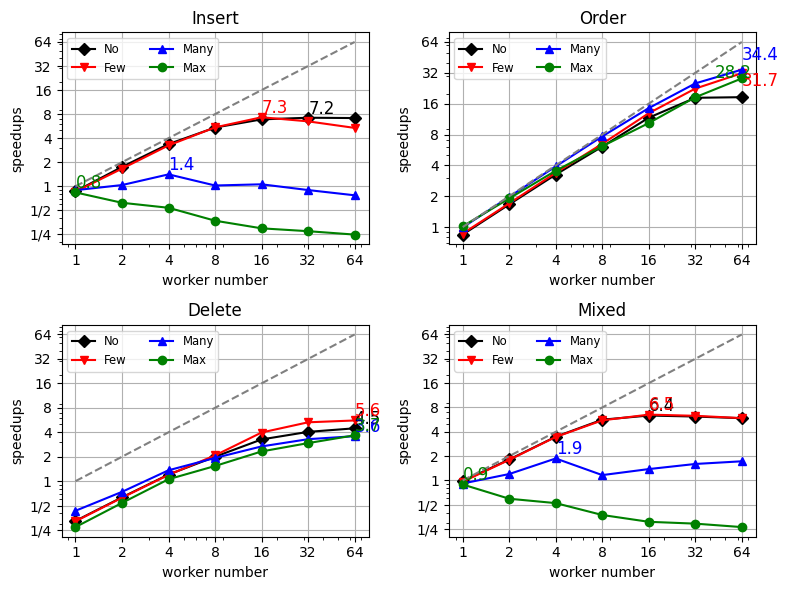

In [24]:
### compare the speedup for 3 case experiment.
def draw_speedup():
    index = 1
    
    #fig = plt.figure(figsize=(16, 3))
    fig = plt.figure(figsize=(8, 6))
    for name, title in zip(method, methodtitle):
        figstring = "22"+ str(index); index += 1
        #ax = fig.add_subplot(1,4, index); 
        ax=fig.add_subplot(int(figstring))
        #index += 1
        ax.set_xlabel("worker number")
        ax.set_ylabel("speedups")
        
        #1 worker
        # r00 = read_data_time("20", 1, "0", name);
        # r01 = read_data_time("21", 1, "0", name);
        # r02 = read_data_time("22", 1, "0", name);
        # r03 = read_data_time("23", 1, "0", name);
        
        #sequential
        r00 = read_data_time("20", 0, "3", name);
        r01 = read_data_time("21", 0, "3", name);
        r02 = read_data_time("22", 0, "3", name);
        r03 = read_data_time("23", 0, "3", name);
        
            
        x = worker; y0=[]; y1 =[]; y2=[]; y3=[];
        y00=[]; y11=[]; y22=[]; y33=[]; 
        for w in x:
            r0 = read_data_time("20", w, "0", name); y0.append(r00[0]/r0[0]);
            r1 = read_data_time("21", w, "0", name); y1.append(r01[0]/r1[0]); 
            r2 = read_data_time("22", w, "0", name); y2.append(r02[0]/r2[0]); 
            r3 = read_data_time("23", w, "0", name); y3.append(r03[0]/r3[0]); 
            
        ax.plot(x, y0, label=case0, marker="D", color="k")
        ax.plot(x, y1, label=case1, marker="v", color="red")
        ax.plot(x, y2, label=case2, marker="^", color="blue")
        ax.plot(x, y3, label=case3, marker="o", color="green")
        ax.plot(x, x, color = "gray", linestyle="dashed")
        
        
        if name != "Otime":
            ymax = 0; xmax = 0
            for x0, y0 in zip(x, y0): 
                if y0 > ymax: ymax = y0; xmax = x0
            ax.text(xmax, ymax+ymax/8, str(round(ymax, 1)), color="k", fontsize=12)
            
            ymax = 0; xmax = 0
            for x0, y0 in zip(x, y1): 
                if y0 > ymax: ymax = y0; xmax = x0
            ax.text(xmax, ymax+ymax/8, str(round(ymax, 1)), color="red", fontsize=12)

            ymax = 0; xmax = 0
            for x0, y0 in zip(x, y2): 
                if y0 > ymax: ymax = y0; xmax = x0
            ax.text(xmax, ymax+ymax/8, str(round(ymax, 1)), color="blue", fontsize=12)

            ymax = 0; xmax = 0
            for x0, y0 in zip(x, y3): 
                if y0 > ymax: ymax = y0; xmax = x0
            ax.text(xmax, ymax+ymax/8, str(round(ymax, 1)), color="green", fontsize=12)
        else:
            ymax = 0; xmax = 0
            for x0, y0 in zip(x, y1): 
                if y0 > ymax: ymax = y0; xmax = x0
            ax.text(xmax, ymax*3/4, str(round(ymax, 1)), color="red", fontsize=12)

            ymax = 0; xmax = 0
            for x0, y0 in zip(x, y2): 
                if y0 > ymax: ymax = y0; xmax = x0
            ax.text(xmax, ymax+ymax/4, str(round(ymax, 1)), color="blue", fontsize=12)

            ymax = 0; xmax = 0
            for x0, y0 in zip(x, y3): 
                if y0 > ymax: ymax = y0; xmax = x0
            ax.text(xmax*2/3, ymax, str(round(ymax, 1)), color="green", fontsize=12)
        
        
        ax.set_title(title)
        ax.set_yscale("log")
        ax.set_xscale("log")
        ax.grid()
        ax.set_xticks(worker)
        # if name != "Itime":
        #     yticks = [1, 2, 4, 8, 16, 32, 64]
        #     ax.set_yticks(yticks)
        # else: 
        #     yticks = [1/4, 1/2, 1, 2, 4, 8, 16, 32, 64]
        #     ax.set_yticklabels({"1/4", "1/2", "1", 2, 4, 8, 16, 32, 64})
        #     ax.set_yticks(yticks)
        if name != "Itime" and name != "Mtime" and name != "Dtime":
            yticks = [1, 2, 4, 8, 16, 32, 64]
            ax.set_yticks(yticks)
            ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
            ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        else: 
            yticks = [1/4, 1/2, 1, 2, 4, 8, 16, 32, 64]
            ax.set_yticks(yticks)
            ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
            ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
            ax.set_yticklabels(["1/4", "1/2", 1, 2, 4, 8, 16, 32, 64])
            
        ax.legend(fontsize="small", ncol=2)
        
    fig.align_labels()
    fig.tight_layout()
    plt.savefig("om-speedup-2.pdf") 
    #plt.show()
global data; data=[]; read_data(); draw_speedup()

<Figure size 1600x350 with 0 Axes>

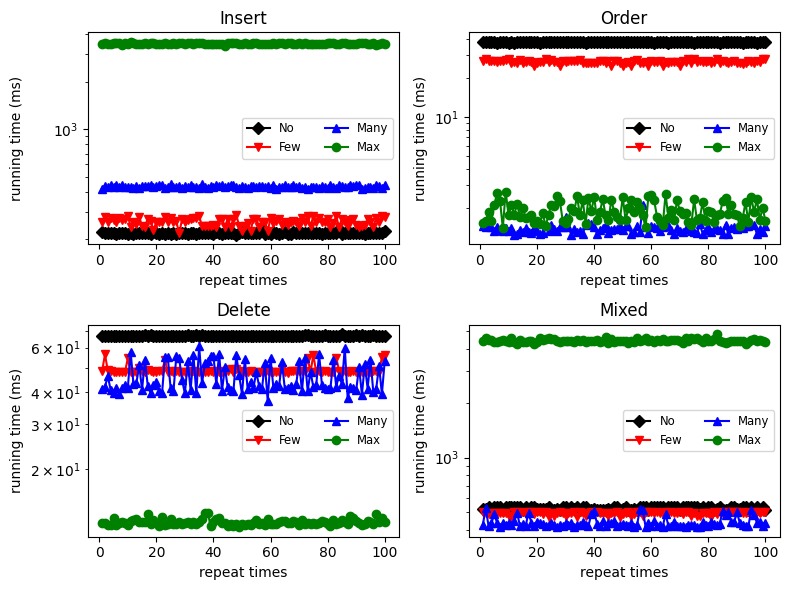

In [26]:
##### draw all test with 32 cores for stability. 

def read_data_time_all(t, worker, l, timestr,):
    global data; mstimes = [];
    for row in data:
        if t != row["t"]: continue
        if l != row["l"]: continue
        if str(worker) != row["w"]: continue
        mstimes.append(float(row[timestr]))
    return mstimes

def draw_time_all():
    index = 1
    fig = plt.figure(figsize=(16, 3.5))
    fig = plt.figure(figsize=(8, 6))
    for name, title in zip(method, methodtitle):
        figstring = "22"+ str(index); index += 1
        #ax = fig.add_subplot(1,4, index); index += 1
        ax = fig.add_subplot(int(figstring));
        ax.set_xlabel("repeat times")
        ax.set_ylabel("running time (ms)")
        
        x = list(range(1,101)); y0=[]; y1 =[]; y2=[]; y3=[]; 
        w = 32
        y0 = read_data_time_all("20", w , "0", name); 
        y1 = read_data_time_all("21", w, "0", name); 
        y2 = read_data_time_all("22", w, "0", name); 
        y3 = read_data_time_all("23", w, "0", name); 
        
        #print(x); print(y0);
        ax.plot(x, y0, label=case0, marker="D", color="k")
        ax.plot(x, y1, label=case1, marker="v", color="red")
        ax.plot(x, y2, label=case2, marker="^", color="blue")
        ax.plot(x, y3, label=case3, marker="o", color="green")
    
        
        ax.set_yscale("log")
        #ax.set_xscale("log")
        #ax.set_xticks(worker)
        ax.set_title(title)
        #ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        ax.legend(fontsize="small", ncol=2)
        
    fig.align_labels()
    fig.tight_layout()
    plt.savefig("om-stability-2.pdf") 
 
global data; data=[]; read_data(); draw_time_all()

In [27]:
#table show the tag# subtag# and relabel  
# def read_data_number(t, worker, l, numstr):
#     global data
#     for row in data:
#         if t != row["t"]: continue
#         if l != row["l"]: continue
#         if str(worker) != row["w"]: continue
#         return row[numstr]
    
def read_data_number(t, worker, l, timestr,):
    global data; mstimes = [];
    for row in data:
        if t != row["t"]: continue
        if l != row["l"]: continue
        if str(worker) != row["w"]: continue
        mstimes.append(int(row[timestr]))
    if len(mstimes) == 0: return 0
    else: return mean_confidence_interval(mstimes)[0]

def draw_info_table():
    global data
    lines = [["Relabel Case", "relabel #", "bottom-label #", "top-label #", "order repeat #"]]
    cases = ["20","21","22","23"]
    casenames = ["No", "Few", "Many", "Max"]
    for case, name in zip(cases, casenames):
        line=[name]
        r = read_data_number(case, "1", "0", "relabel#"); str = '{:,}'.format(int(r));  line.append(str) 
        r = read_data_number(case, "1", "0", "subtag#"); str = '{:,}'.format(int(r)); line.append(str)
        r = read_data_number(case, "1", "0", "tag#"); str = '{:,}'.format(int(r)); line.append(str)
        r = read_data_number(case, "1", "0", "morepeat#"); str = '{:,}'.format(int(r)); line.append(str)
       
        lines.append(line)
    print(tabulate(lines))
    print("")
    for line in lines:
        print(" & ".join(line) + " \\\\")
global data; data=[]; read_data(); draw_info_table()

------------  ---------  --------------  -----------  --------------
Relabel Case  relabel #  bottom-label #  top-label #  order repeat #
No            0          10,000,000      0            0
Few           62,535     11,750,982      125,070      0
Many          356,815    19,990,836      6,301,980    0
Max           357,142    19,999,976      99,024,410   0
------------  ---------  --------------  -----------  --------------

Relabel Case & relabel # & bottom-label # & top-label # & order repeat # \\
No & 0 & 10,000,000 & 0 & 0 \\
Few & 62,535 & 11,750,982 & 125,070 & 0 \\
Many & 356,815 & 19,990,836 & 6,301,980 & 0 \\
Max & 357,142 & 19,999,976 & 99,024,410 & 0 \\


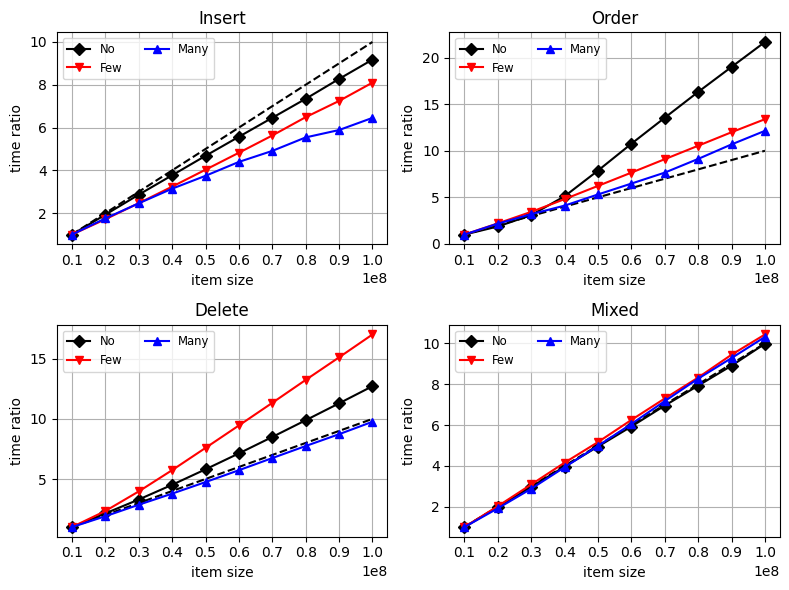

In [30]:
#### for the scalability 
### compare the speedup for 3 case experiment.
files = [
    "results-om-scalability-7-22-2022.csv" #T5 the average running time for repeated random graphs. 10 times test.
]
def read_data_time2(i, t, worker, l, timestr,):
    global data; mstimes = [];
    for row in data:
        if str(i) != row["I"]: continue
        if t != row["t"]: continue
        if l != row["l"]: continue
        if str(worker) != row["w"]: continue
        mstimes.append(float(row[timestr]))
    if len(mstimes) == 0: return [0,0]
    else: return mean_confidence_interval(mstimes)

def draw_scalability():
    index = 1
    fig = plt.figure(figsize=(8, 6))
    #fig = plt.figure(figsize=(16, 3))
    for name, title in zip(method, methodtitle):
        #ax = fig.add_subplot(1,4, index); index += 1
        figstring = "22"+ str(index); index += 1
        ax = fig.add_subplot(int(figstring)); 
        ax.set_xlabel("item size")
        ax.set_ylabel("time ratio")
            
        x = [10000000, 20000000, 30000000, 40000000, 50000000, 60000000, 70000000, 80000000, 90000000,100000000]; 
        y0=[]; y1 =[]; y2=[]; y3=[]; 
        
        y00 = []; y01 = []; y02 =[]; y03 = []
        r00 = read_data_time2(10000000, "20", 32, "0", name); 
        r01 = read_data_time2(10000000, "21", 32, "0", name); 
        r02 = read_data_time2(10000000, "22", 32, "0", name); 
        r03 = read_data_time2(10000000, "23", 32, "0", name); 
        
        for i in x:
            y00.append(r00[0] * (i / 10000000));
            y01.append(r01[0] * (i / 10000000)); 
            y02.append(r02[0] * (i / 10000000)); 
        
            
        for i in x:
            r0 = read_data_time2(i, "20", 32, "0", name); y0.append(r0[0]/r00[0]);
            r1 = read_data_time2(i, "21", 32, "0", name); y1.append(r1[0]/r01[0]); 
            r2 = read_data_time2(i, "22", 32, "0", name); y2.append(r2[0]/r02[0]); 
            r3 = read_data_time2(i, "23", 32, "0", name); y3.append(r3[0]/r03[0]); 
        
        z = []
        for i in x:
            z.append((i / 10000000));
        
        ax.plot(x, z, color = "k", linestyle="dashed")
        ax.plot(x, y0, label=case0, marker="D", color="k")
        ax.plot(x, y1, label=case1, marker="v", color="red")
        ax.plot(x, y2, label=case2, marker="^", color="blue")
        #ax.plot(x, y3, label=case3, marker="o", color="green")
        
        #ax.plot(x, y3, label=case3, marker="o", color="green")
        #ax.plot(x, x, color = "gray", linestyle="dashed")
        
#         ax.plot(x, y00, color="k", linestyle="dashed")
#         ax.plot(x, y01, color="red", linestyle="dashed")
#         ax.plot(x, y02, color="blue", linestyle="dashed")
        
        # ax.plot(x[9], y00[9], 'ro', marker="D", color="k", fillstyle="none")
        # ax.plot(x[9], y01[9], 'ro', marker="v", color="red", fillstyle="none")     
        # ax.plot(x[9], y02[9], 'ro', marker="^", color="blue", fillstyle="none")
            
        ax.set_title(title)
        #ax.set_yscale("log")
        #ax.set_xscale("log")
        ax.grid()
        ax.set_xticks(x)
        # if name != "Itime":
        #     yticks = [1, 2, 4, 8, 16, 32, 64]
        #     ax.set_yticks(yticks)
        # else: 
        #     yticks = [1/4, 1/2, 1, 2, 4, 8, 16, 32, 64]
        #     ax.set_yticklabels({"1/4", "1/2", "1", 2, 4, 8, 16, 32, 64})
        #     ax.set_yticks(yticks)
        # if name != "Itime" and name != "Mtime":
        #     yticks = [1, 2, 4, 8, 16, 32, 64]
        #     ax.set_yticks(yticks)
        #     ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        #     ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        # else: 
        #     yticks = [1/4, 1/2, 1, 2, 4, 8, 16, 32, 64]
        #     ax.set_yticks(yticks)
        #     ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        #     ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        #     ax.set_yticklabels(["1/4", "1/2", 1, 2, 4, 8, 16, 32, 64])
            
        ax.legend(fontsize="small", ncol=2)
        
    fig.align_labels()
    fig.tight_layout()
    plt.savefig("om-scalability-2.pdf") 
    #plt.show()
global data; data=[]; read_data(); draw_scalability()
